# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
import os
os.chdir("C:/Users/SAFEER/Desktop/excler/assignment/Basic stats - 1")
# load the dataset into a pandas DataFrame which will facilitate easy descriptive analytics and data preprocessing:
import pandas as pd
df=pd.read_csv("sales_data_with_discounts.csv")

In [2]:
# first few rows of dataframe 
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [3]:
# deatils about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [4]:
# change data type of date column into date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               450 non-null    datetime64[ns]
 1   Day                450 non-null    object        
 2   SKU                450 non-null    object        
 3   City               450 non-null    object        
 4   Volume             450 non-null    int64         
 5   BU                 450 non-null    object        
 6   Brand              450 non-null    object        
 7   Model              450 non-null    object        
 8   Avg Price          450 non-null    int64         
 9   Total Sales Value  450 non-null    int64         
 10  Discount Rate (%)  450 non-null    float64       
 11  Discount Amount    450 non-null    float64       
 12  Net Sales Value    450 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usag

## 1. Descriptive Analytics for Numerical Columns

In [5]:
# Select new dataframe from the df that have only numerical columns.
df_num = df.select_dtypes(include=['int64','float64'])
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [6]:
# Display descriptive statistics for the numerical columns
df_num.describe().round(2).T 

,count,mean,std,min,25%,50%,75%,max
Volume,450.0,5.07,4.23,1.00,3.00,4.00,6.00,31.00
Avg Price,450.0,10453.43,18079.90,290.00,465.00,1450.00,10100.00,60100.00
Total Sales Value,450.0,33812.84,50535.07,400.00,2700.00,5700.00,53200.00,196400.00
Discount Rate (%),450.0,15.16,4.22,5.01,13.97,16.58,18.11,19.99
Discount Amount,450.0,3346.50,4509.90,69.18,460.46,988.93,5316.50,25738.02
Net Sales Value,450.0,30466.34,46358.66,326.97,2202.21,4677.79,47847.91,179507.48


### **Here's a brief interpretation of the descriptive statistics for each numerical column:**

#### Volume:
* The average volume is 5.07, with a standard deviation of 4.23, indicating moderate variability in volume.
* The volume ranges from 1 to 31, with the middle 50% of the data (from the 25th to the 75th percentile) falling between 3 and 6.

#### Avg Price:
* The average price is 10,453.43, with a high standard deviation of 18,079.90, indicating significant variability in prices.
* Prices range from 290 to 60,100, with the middle 50% of prices between 465 and 10,100. This large range and high standard deviation suggest the presence of outliers or a wide range of price points.

#### Total Sales Value:
* The average total sales value is 33,812.84, with a standard deviation of 50,535.07, also indicating high variability.
* Total sales values range from 400 to 196,400, with the middle 50% of sales values between 2,700 and 53,200, pointing to a wide distribution and potential outliers.

#### Discount Rate:

* The average discount rate is 15.16%, with a standard deviation of 4.22%, indicating some variability in discount rates.
* Discount rates range from 5.01% to 19.99%, with the middle 50% of rates between 13.97% and 18.11%.

#### Discount Amount:

* The average discount amount is 3,346.50, with a high standard deviation of 4,509.90, indicating substantial variability.
* Discount amounts range from 69.18 to 25,738.02, with the middle 50% of discount amounts between 460.46 and 5,316.50, suggesting a few high discount amounts that might be skewing the data.

#### Net Sales Value:

* The average net sales value is 30,466.34, with a standard deviation of 46,358.66, indicating considerable variability.
* Net sales values range from 326.97 to 179,507.48, with the middle 50% of net sales values between 2,202.21  and 47,847.91, again pointing to a wide distribution and potential outliers.

### General Interpretation

**Variability**: The high standard deviations in Avg Price, Total Sales Value, Discount Amount, and Net Sales Value suggest significant variability in these measures. This could indicate the presence of outliers or a diverse range of products or transactions.

**Distribution**: The wide ranges between the minimum and maximum values, along with the differences between the 25th, 50th, and 75th percentiles, show that the data is not uniformly distributed and has significant spread.

**Central Tendency**: Median values (50th percentile) are generally lower than the mean in Avg Price, Total Sales Value, Discount Amount, and Net Sales Value, indicating a right-skewed distribution where some higher values are pulling the mean upwards.


## 2. Data Visualization

In [7]:
# Importing Necessary Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Histogram

In [8]:
# Histograms Function
def fn_hist(dataset,column):
    plt.figure(figsize = [20,8])
    sns.histplot(dataset[column], color = 'purple')
    pltname = 'Histogram of ' + column
    plt.title(pltname)
    plt.show()

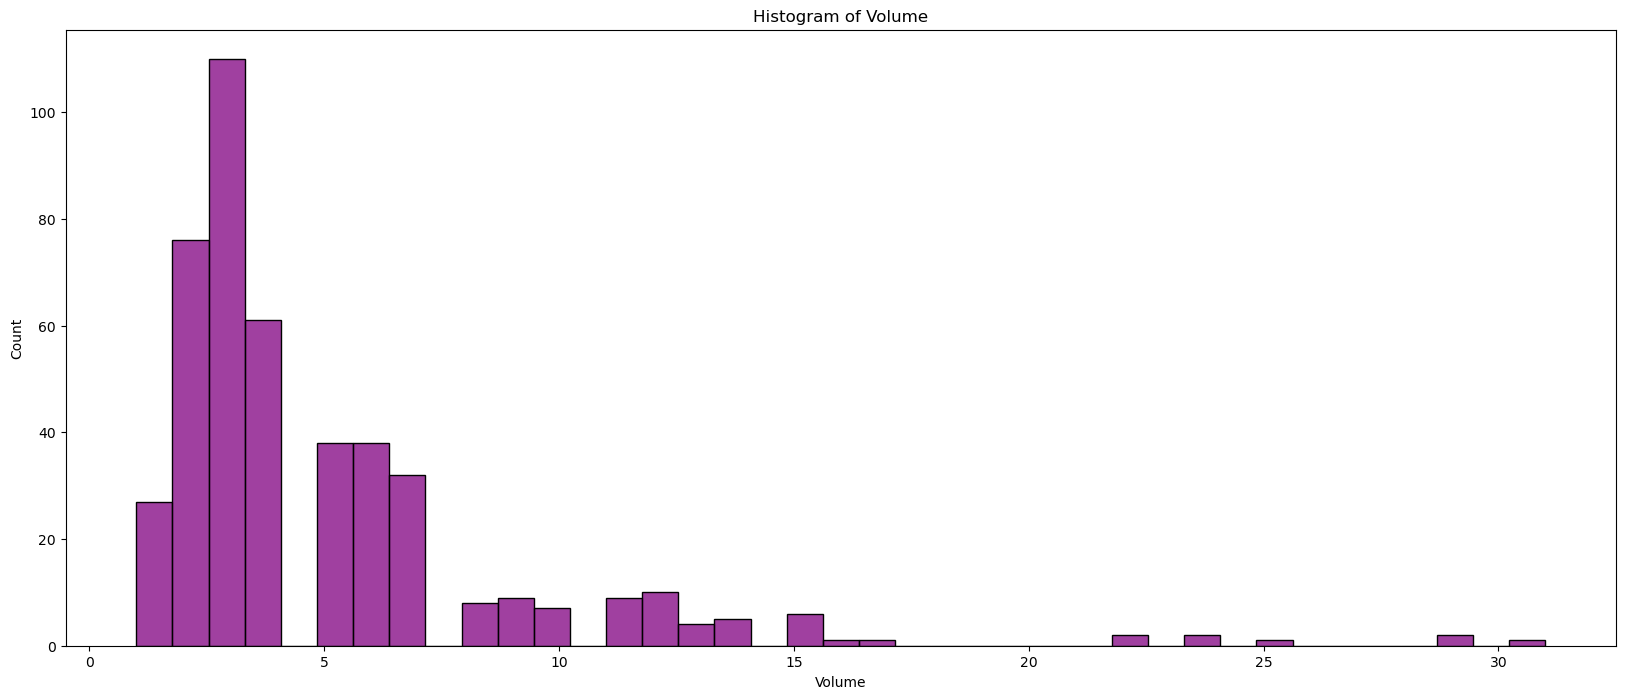

In [9]:
# Histograms of Volume
fn_hist(df,'Volume');

#### Inference
* The histogram for the Volume column reveals the presence of outliers and right-skewed distribution.
* The majority of Volume values fall between 2 and 4.
* The most frequent Volume value is 3, with a count exceeding 100.

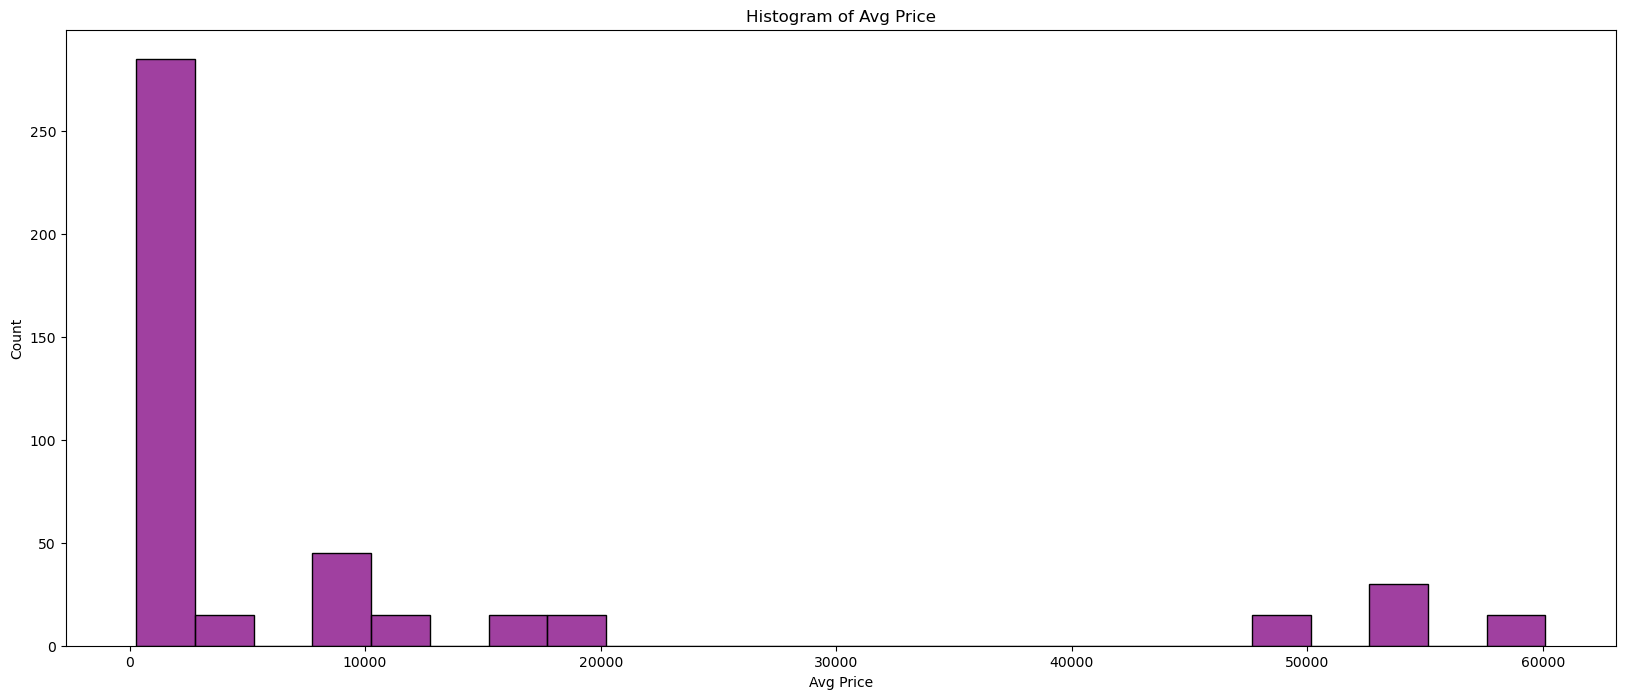

In [10]:
# Histograms of Avg Price
fn_hist(df,'Avg Price');

#### Inference
* The histogram for the Avg Price reveals the presence of outliers.
* The majority of Avg Price fall between 290 and 2100.

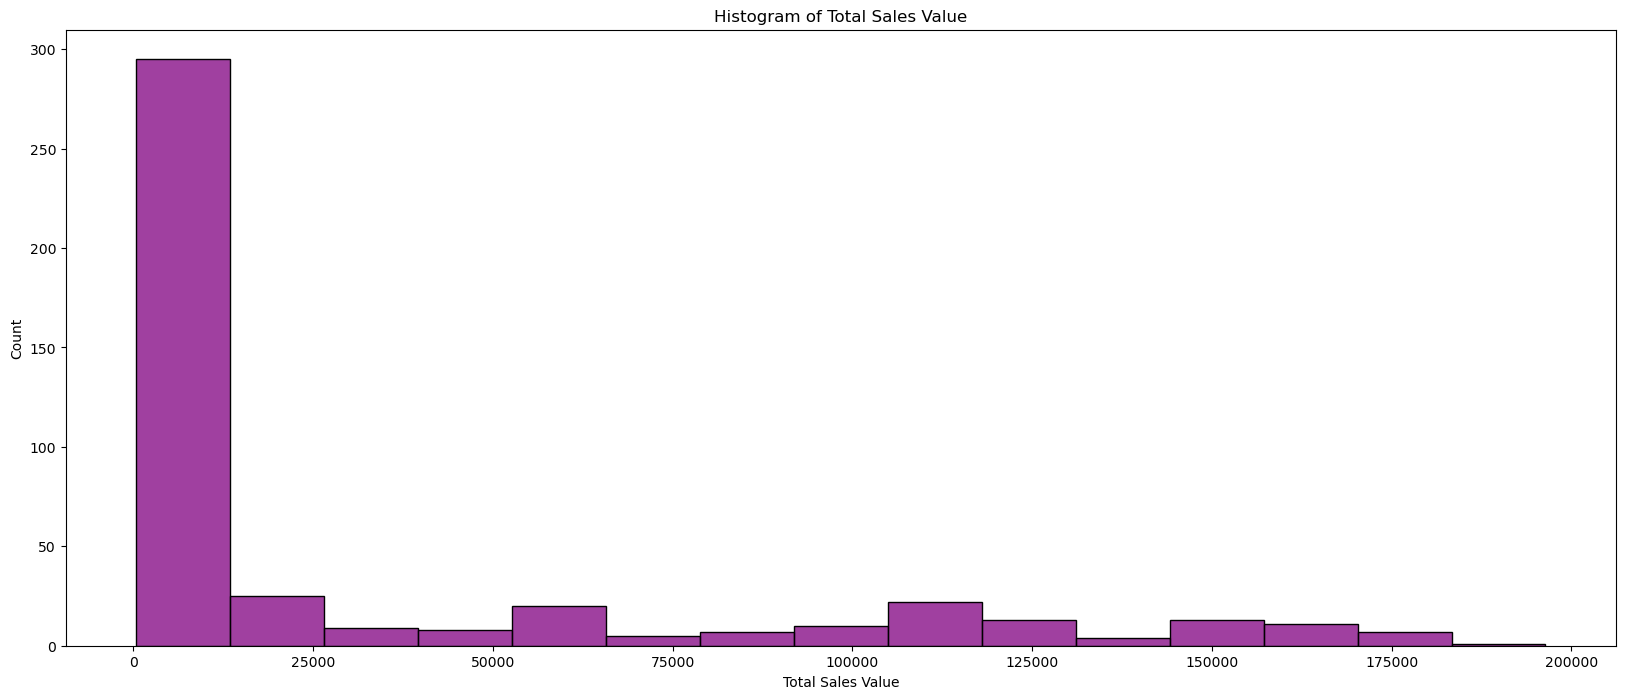

In [11]:
# Histograms of Total Sales Value
fn_hist(df,'Total Sales Value');

#### Inference
* The histogram for the Total Sales Value reveals the presence of outliers.
* The majority of Avg Price fall between 400 and 12500.

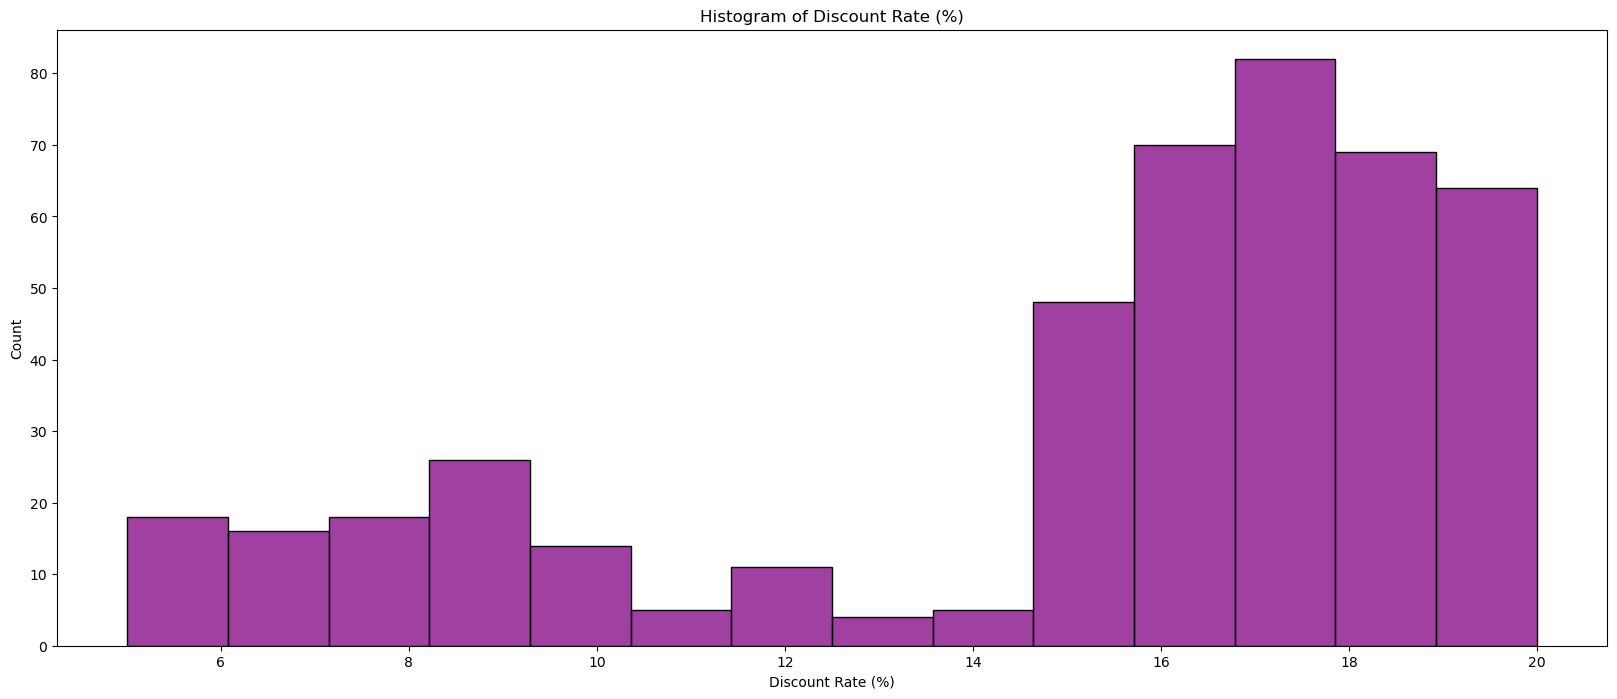

In [12]:
# Histograms of Discount Rate (%)
fn_hist(df,'Discount Rate (%)');

#### Inference
* The histogram for the Discount Rate (%) seams fine. cannot consider values as outliers. But it is left-skewed distribution.
* The majority of Discount Rate (%) fall between 15 and 20.

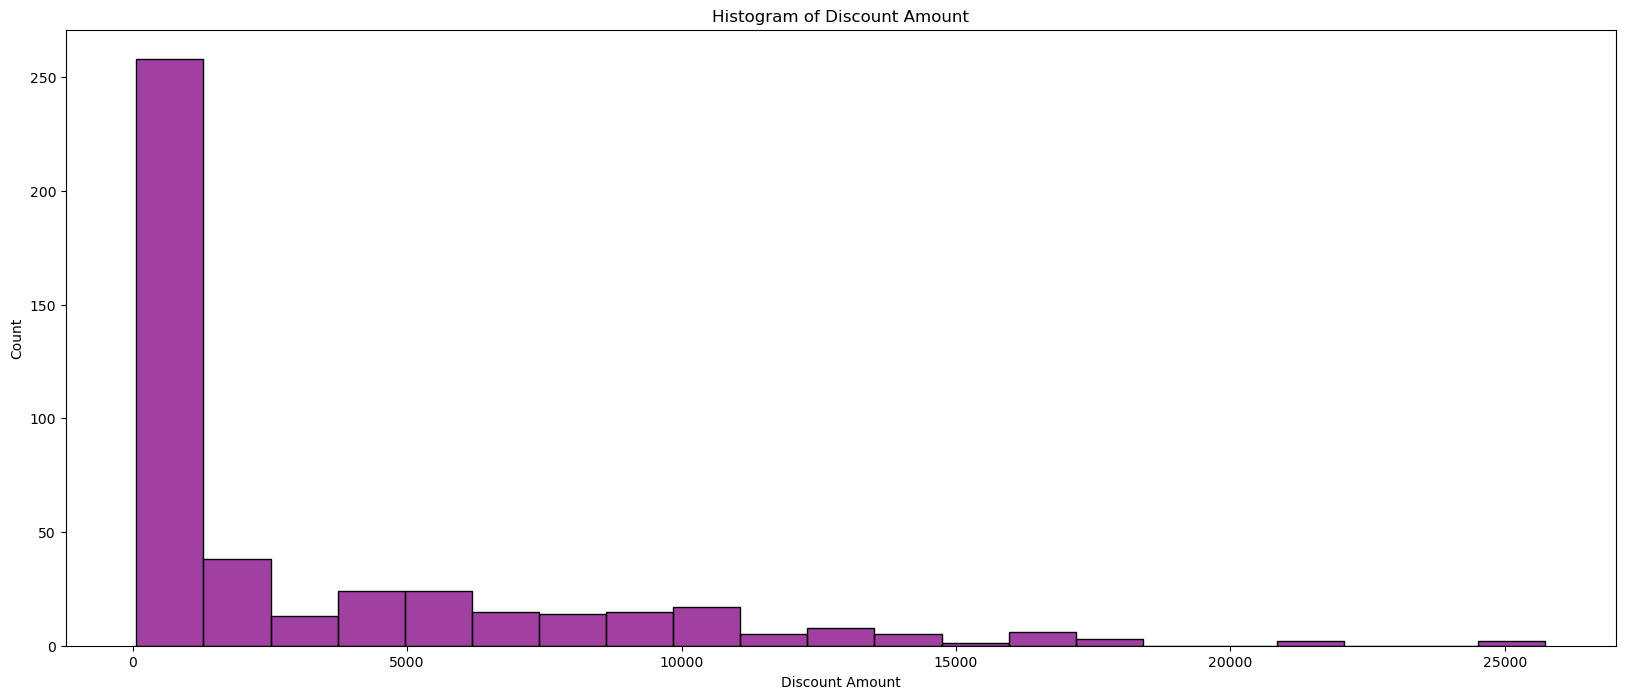

In [13]:
# Histograms of Discount Amount
fn_hist(df,'Discount Amount');

#### Inference
* The histogram for the Discount Amount reveals the presence of outliers. 
* The majority of Discount Amount fall between 69 and 2000.

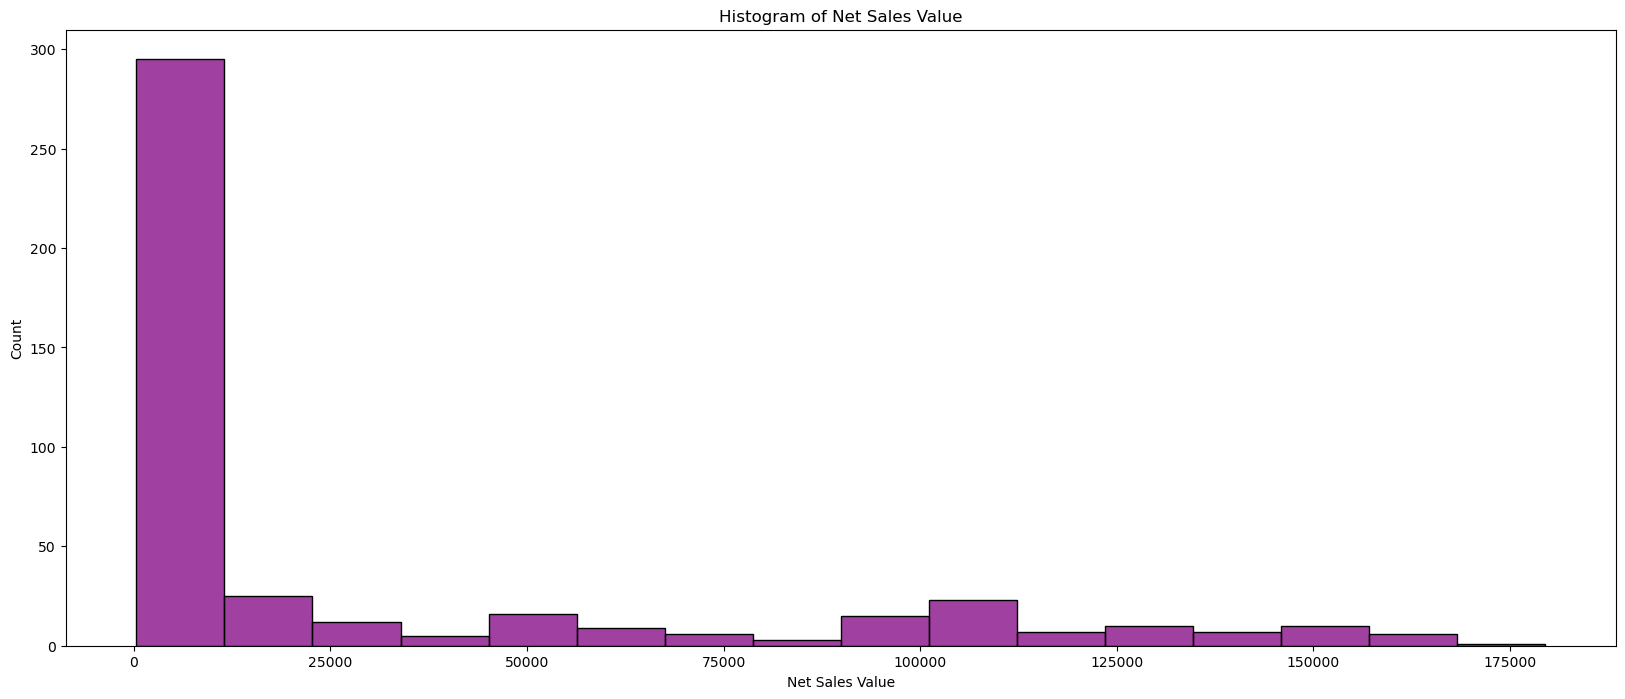

In [14]:
# Histograms of Net Sales Value
fn_hist(df,'Net Sales Value');

#### Inference
* The histogram for the Net Sales Value reveals the presence of outliers. 
* The majority of Net Sales Value fall between 360 and 12500.

### Box Plot

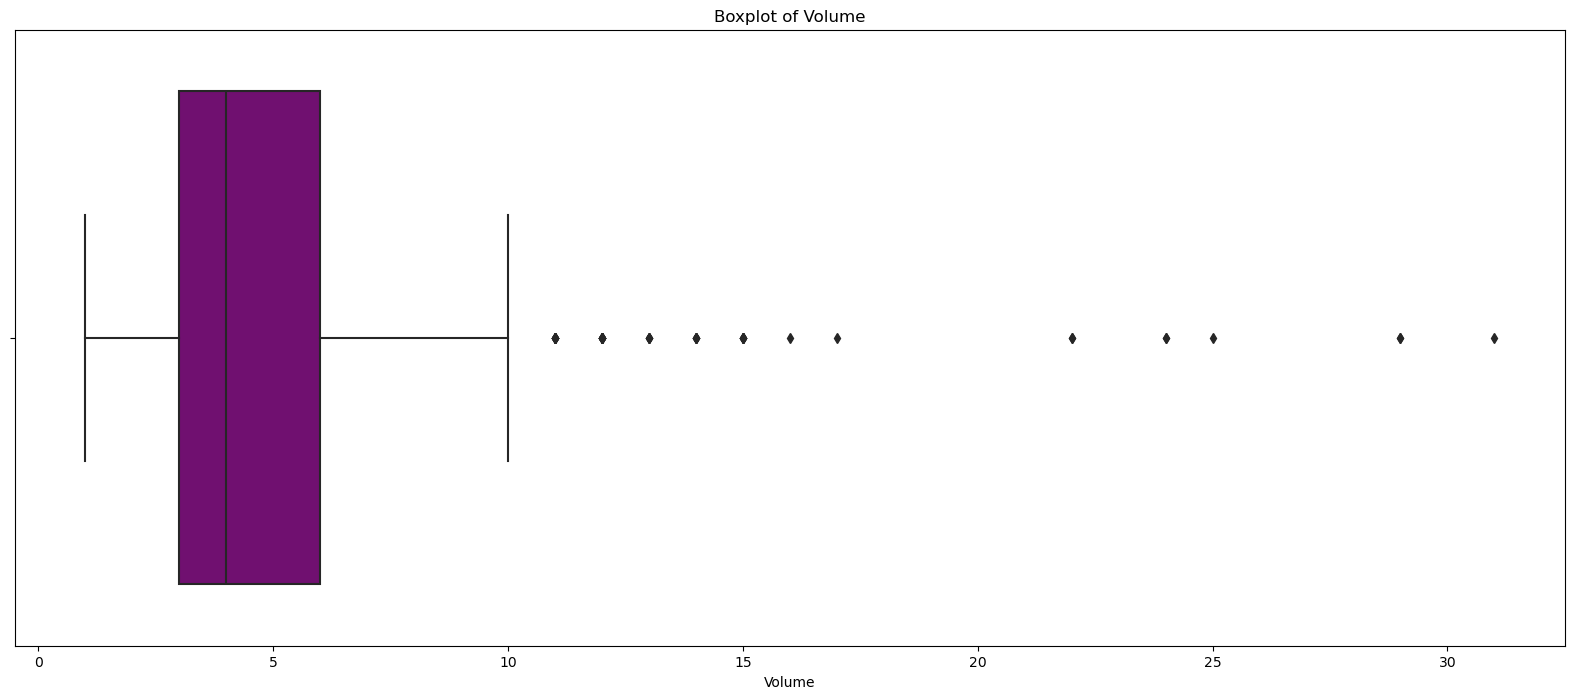

In [15]:
# Boxplot of volume
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Volume'], color='purple')
plt.title('Boxplot of Volume');

#### Inference
* Range and Extremes: The whiskers are extend from 1 to 10, this means most of the data lies within this range.
* Skewness: The median line is closer to the left of the box, and the right whisker is longer, this suggests a right-skewed distribution.
* Outliers: There are points plotted beyond the whiskers, such as at 31, these are outliers indicating unusually high Volume values.

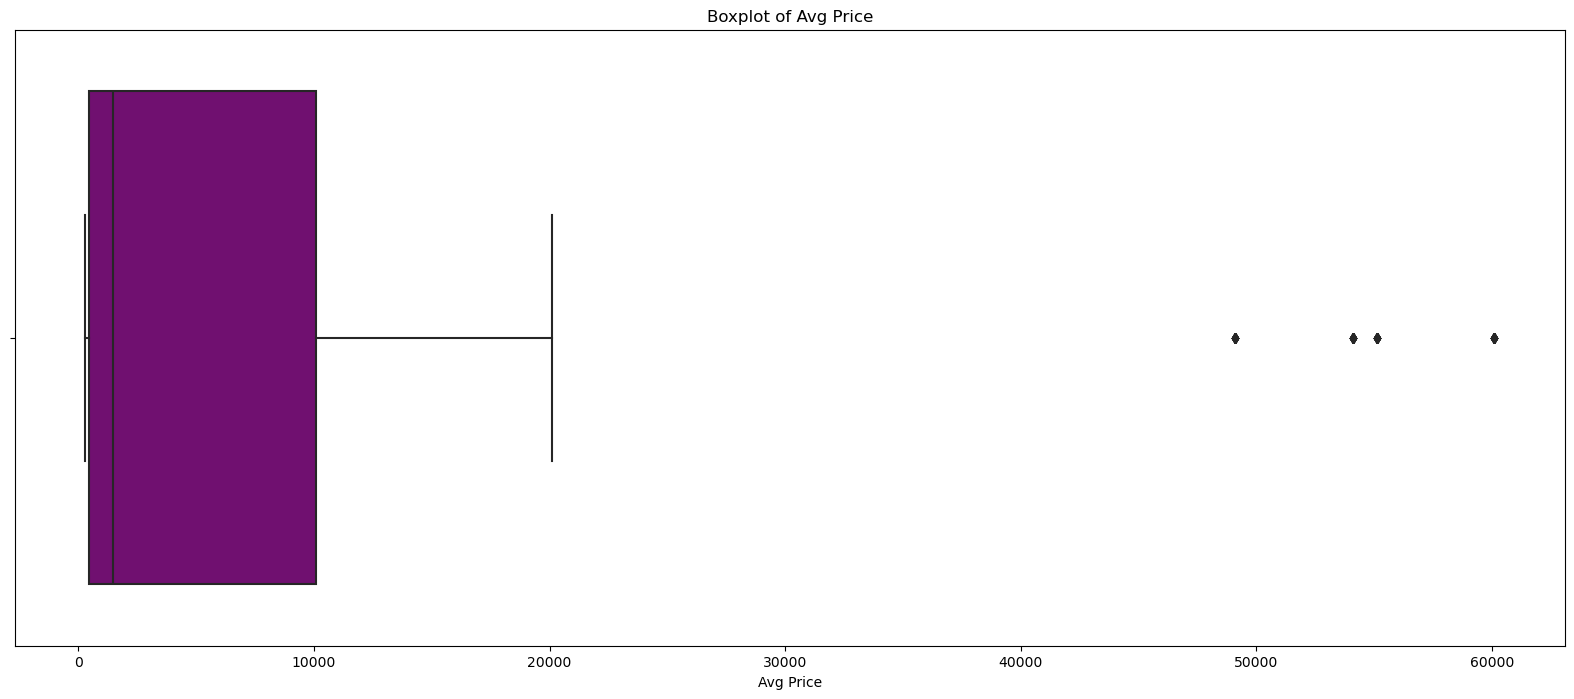

In [16]:
# Boxplot of Avg Price
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Avg Price'], color='purple')
plt.title('Boxplot of Avg Price');

#### Inference
* Skewness: The median line is very closer to the left of the box, and the right whisker is longer, this suggests a right-skewed distribution.
* Outliers: There are 4 points plotted beyond the whiskers, these are outliers indicating unusually high Avg Price.
* This skewness and the presence of outliers suggest that while many 'Avg Price' values are relatively low, there are a few very high values that impact the overall distribution.

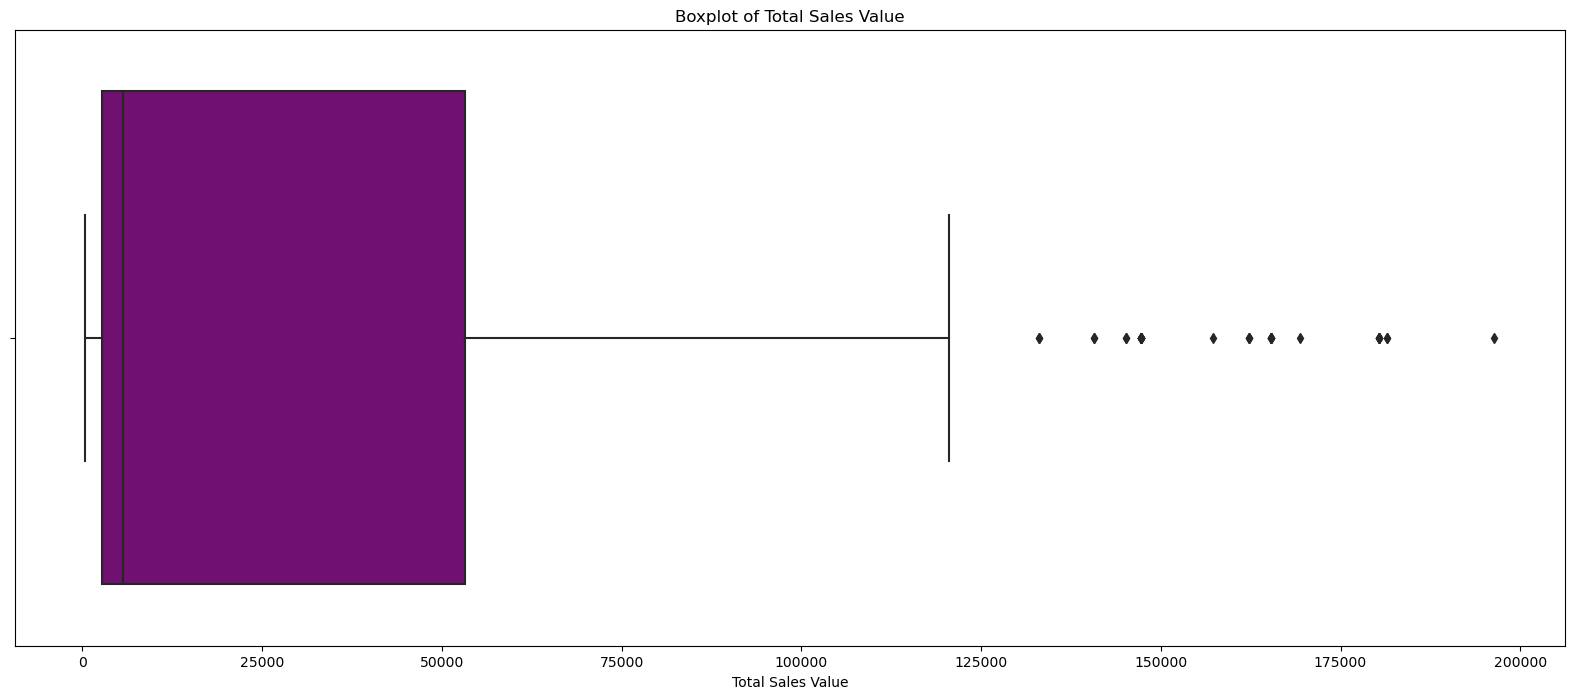

In [17]:
# Boxplot of Total Sales Value
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Total Sales Value'], color='purple')
plt.title('Boxplot of Total Sales Value');

#### Inference
* Skewness: The median line is very closer to the left of the box, and the right whisker is longer, this suggests a right-skewed distribution.
* The interquartile range (IQR), which is the range between the first quartile (2,700) and the third quartile (53,200), represents the middle 50% of the data. This large IQR indicates a significant spread in the central part of the data.
* The long IQR suggests high variability in the Total Sales Value among the middle 50% of the observations.
* Outliers: There are some points plotted beyond the whiskers, They can indicate exceptional sales instances or potential anomalies.


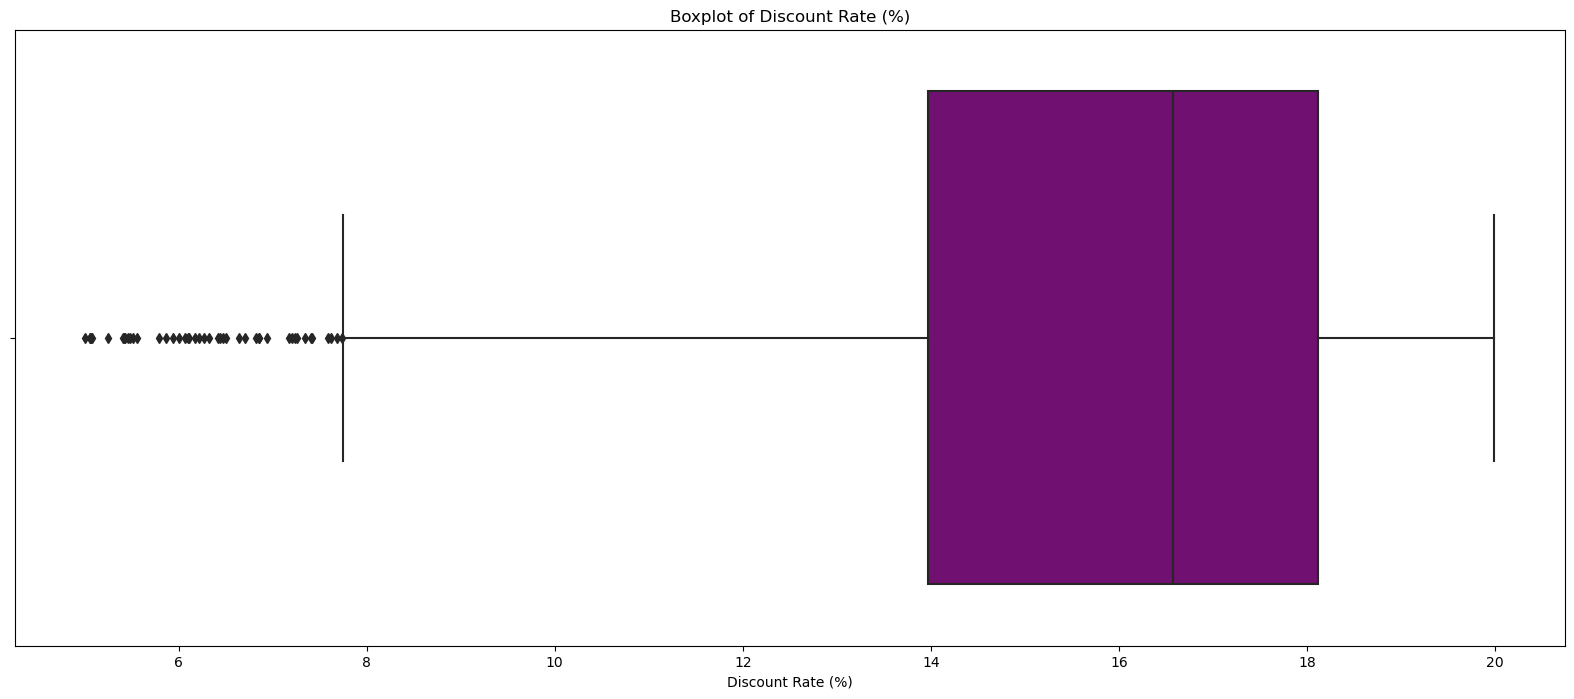

In [18]:
# Boxplot of Discount Rate (%)
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Discount Rate (%)'], color='purple')
plt.title('Boxplot of Discount Rate (%)');

#### Inference
* Median Position: The median is close to the center of the IQR, indicating that the data is symmetrically distributed around the median.
* Interquartile Range (IQR): The middle 50% of discount rates lie between approximately 14% and 18%, indicating moderate variability.
* Whiskers and Outliers: If there are any data points outside the whiskers, they would be potential outliers indicating unusually low or high discount rates. For example, a discount rate of 5.01% might be considered an outlier if it lies significantly outside the lower whisker.

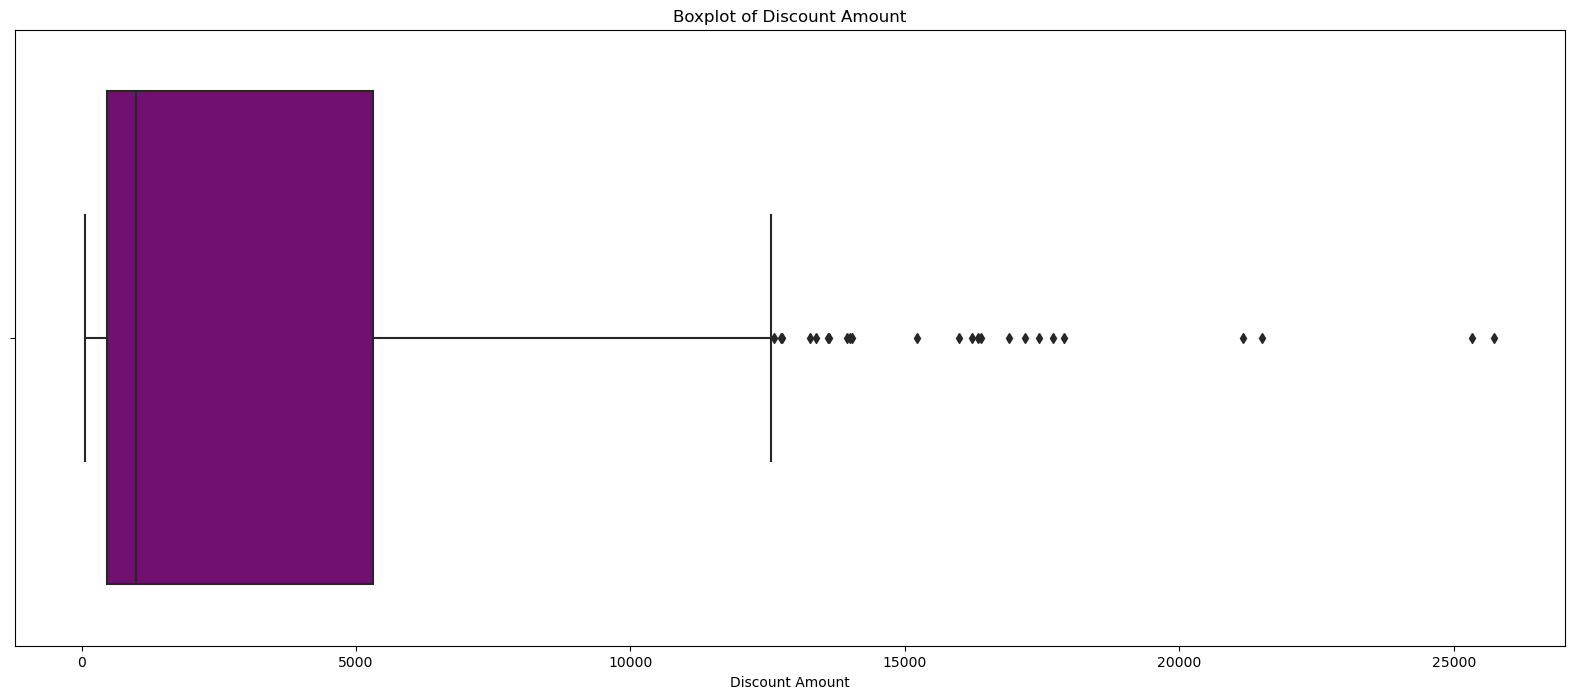

In [19]:
# Boxplot of Discount Amount
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Discount Amount'], color='purple')
plt.title('Boxplot of Discount Amount');

#### Inference
* The 'Discount Amount' data has several high outliers, indicating that while most discounts are relatively moderate, there are a few instances of very large discounts.
* The distribution is right-skewed, meaning that there are more discount amounts on the higher side compared to the lower side.
* The majority of discount amounts lie between 460.46 and 5,316.00, with the median at 988.93, suggesting that a typical discount is around this value, but significant variability exists.

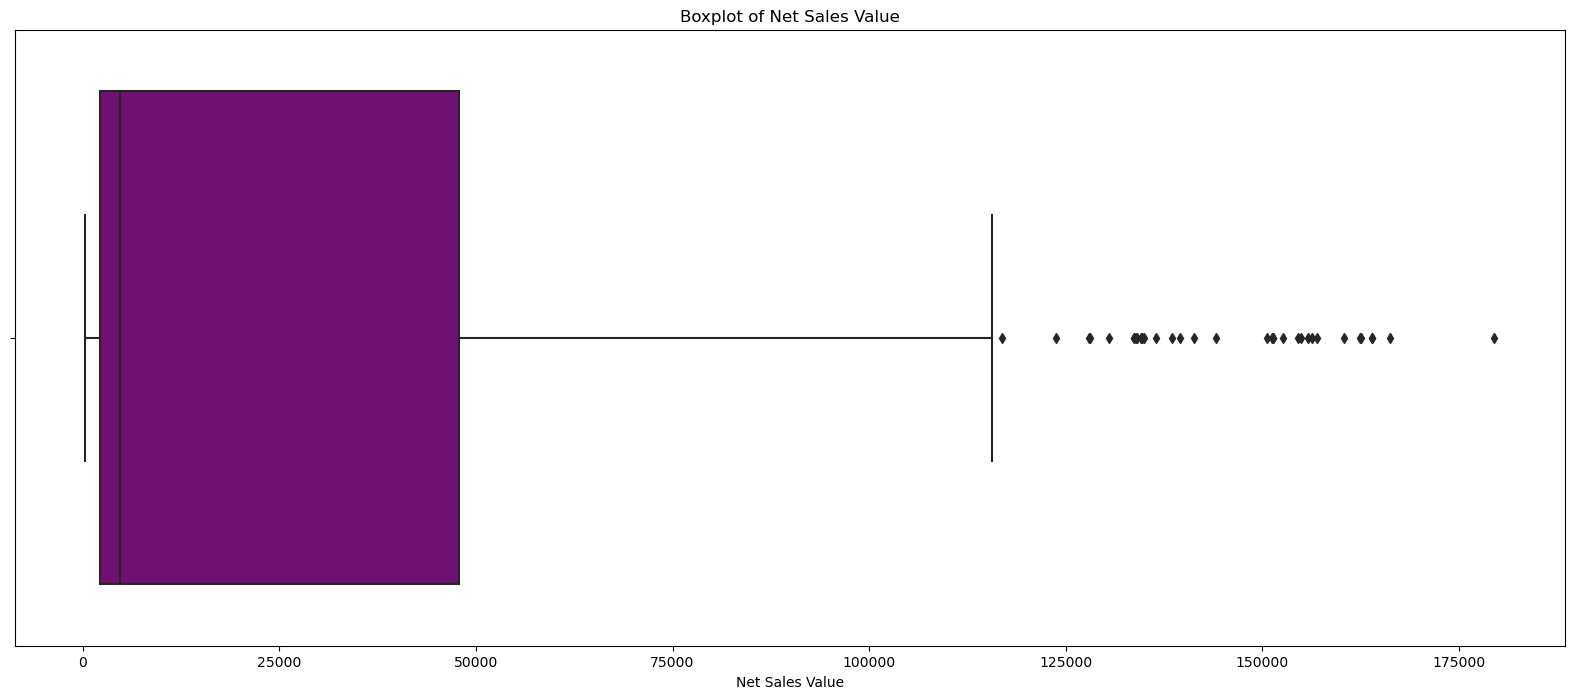

In [20]:
# Boxplot of Net Sales Value
plt.figure(figsize = [20,8])
sns.boxplot(x=df['Net Sales Value'], color='purple')
plt.title('Boxplot of Net Sales Value');

#### Inference
* The 'Net Sales Value' data is right-skewed, with a majority of transactions having lower values.
* There is significant variability in 'Net Sales Value', as indicated by the wide interquartile range.
* The presence of outliers with exceptionally high values suggests the occurrence of some extraordinary sales transactions or potential errors in the data.

### Bar Chart Analysis for Categorical Column:

In [21]:
# Select columns from the DataFrame that are of object type (i.e., categorical columns)
catg_columns=[col for col in df.columns if df[col].dtype == 'O']
catg_columns

['Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

In [22]:
# Create a DataFrame having only categorical columns
df_catg = df[catg_columns]
df_catg

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


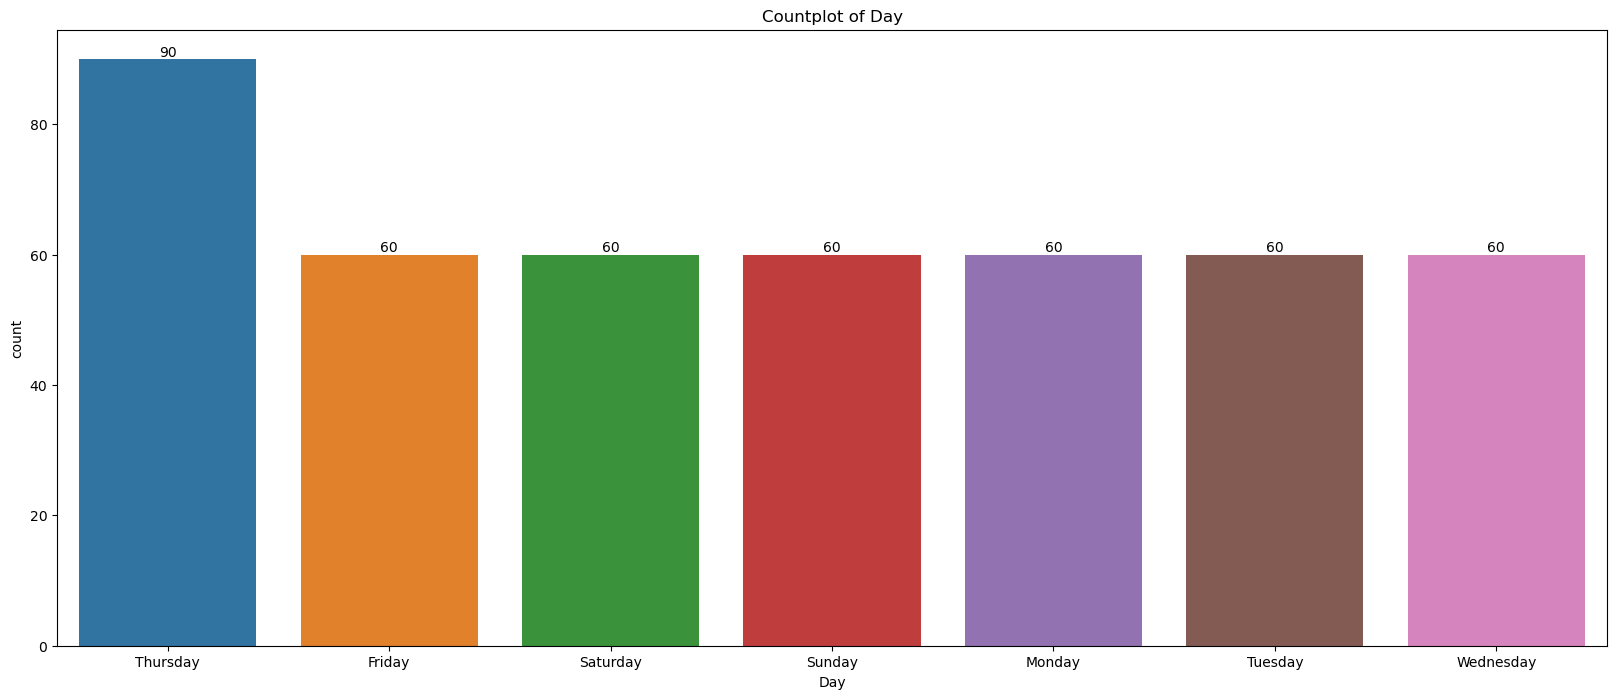

In [23]:
# count plot of Day
plt.figure(figsize = [20,8])
a=sns.countplot(x=df['Day'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of Day');

#### Inference
* Based on the analysis of the plot, it is evident that the daily sales are consistently 30 sales. The dataset includes three Thursdays, whereas all other days of the week appear only twice. Consequently, the sales count for Thursdays totals 90 units, while the sales count for all other days is 60 units.

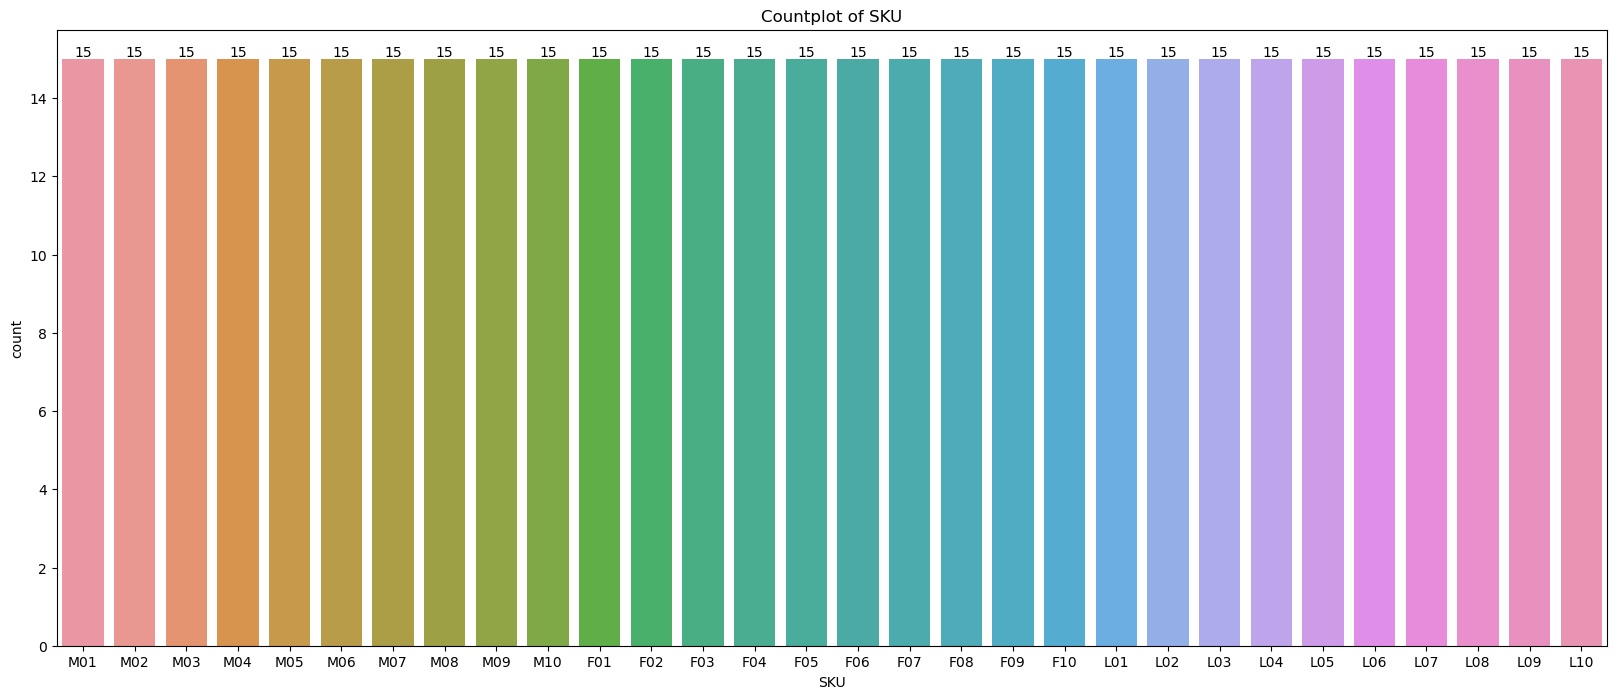

In [24]:
# count plot of SKU
plt.figure(figsize = [20,8])
a=sns.countplot(x=df['SKU'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of SKU');

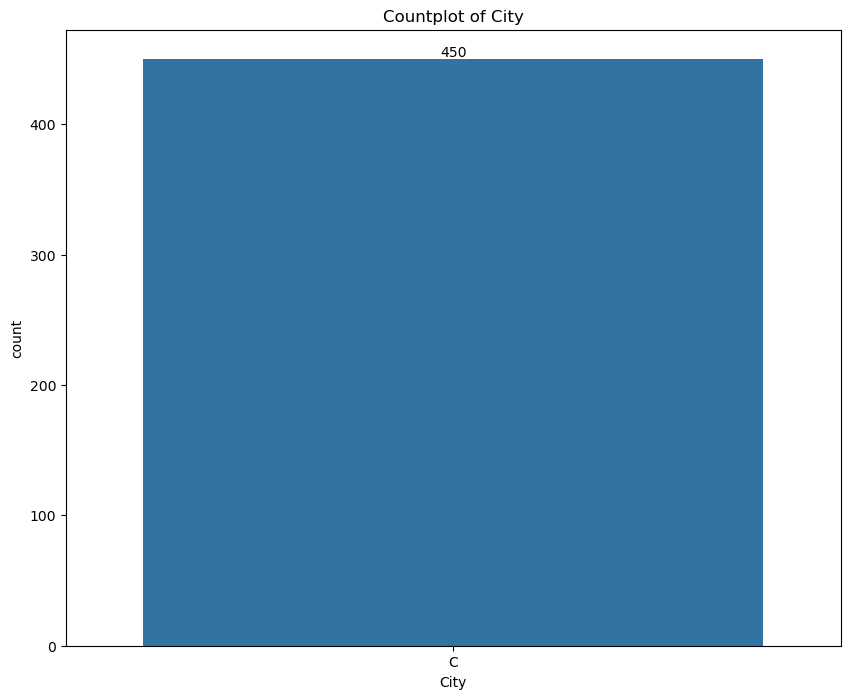

In [25]:
# count plot of City
plt.figure(figsize = [10,8])
a=sns.countplot(x=df['City'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of City');

#### inference 
* Sales datas are from only one city

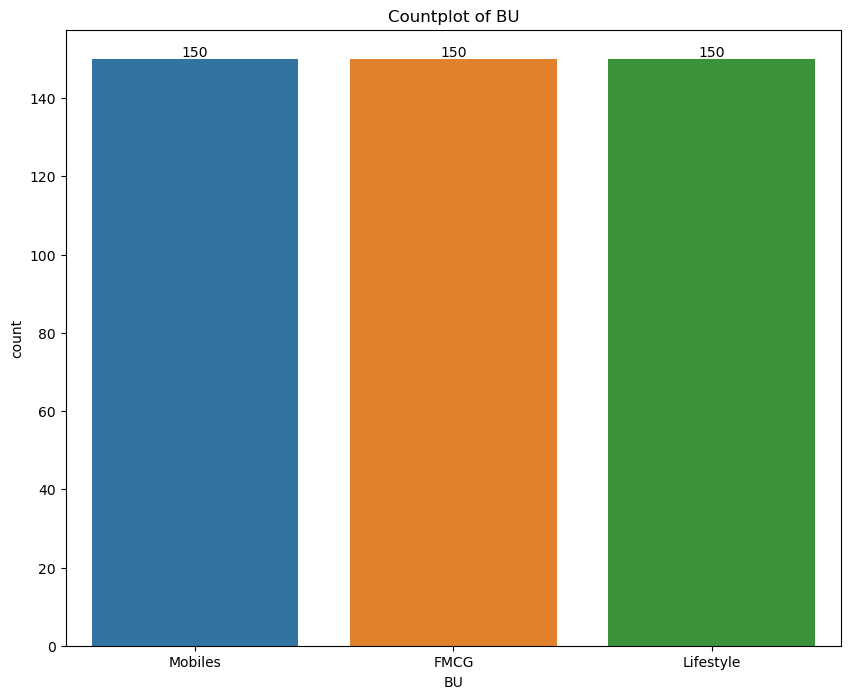

In [26]:
# count plot of BU
plt.figure(figsize = [10,8])
a=sns.countplot(x=df['BU'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of BU');

#### inference 
* Three different product type's (Mobiles, FMCG, Lifestyle) sales datas are available.

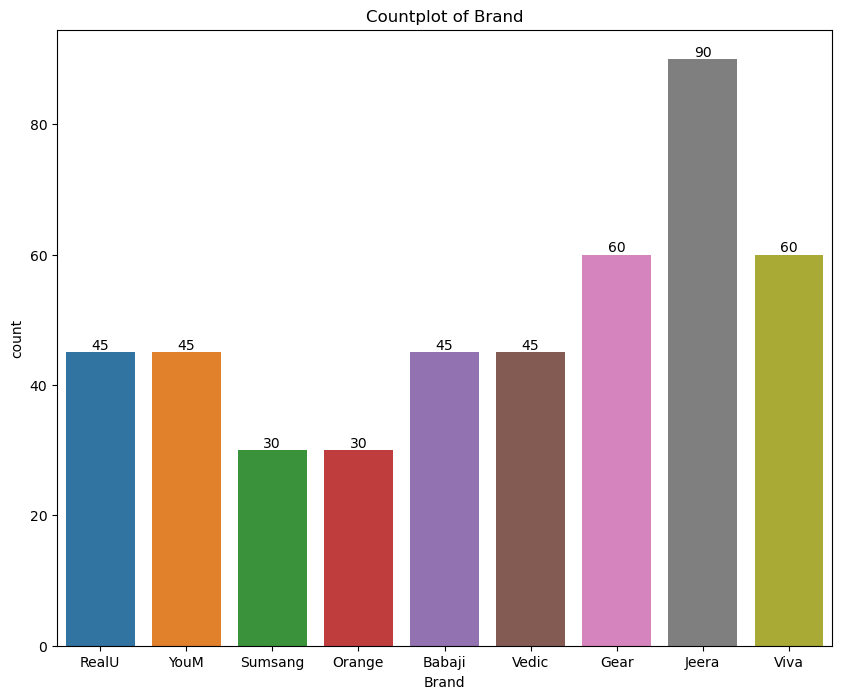

In [27]:
# count plot of Brand
plt.figure(figsize = [10,8])
a=sns.countplot(x=df['Brand'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of Brand');

#### Inference
* The height of each bar indicates the count of each brand. Brands with taller bars (Jeera from Lifestyle) are more common in the dataset.
* In Mobile the least frequent brands are Samsang and Orange and RealU and YouM are most frequent Brand.
* In FMCG Gear is most frequent Brand.
* In Lyfestyle Jeera is most frequent Brand.

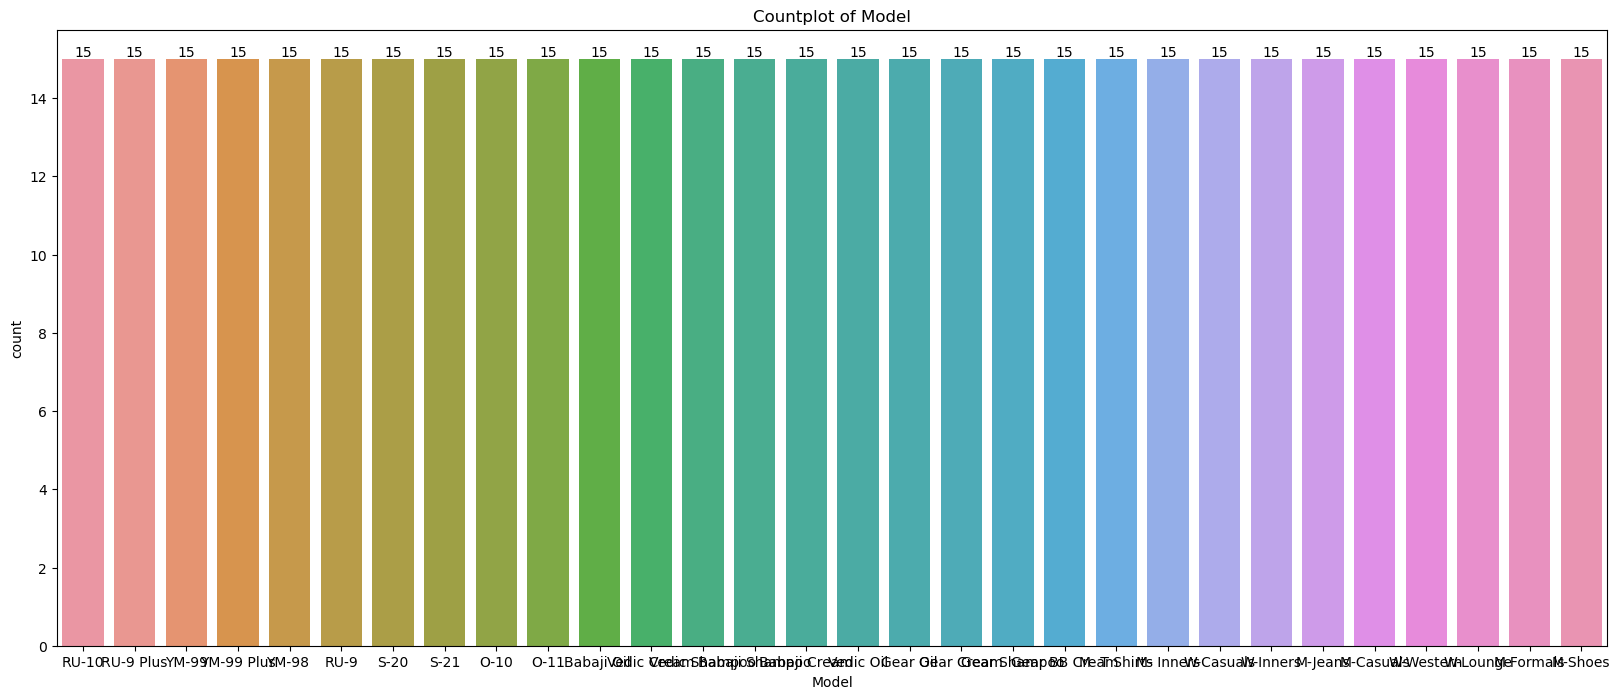

In [28]:
# count plot of Model
plt.figure(figsize = [20,8])
a=sns.countplot(x=df['Model'])
a.bar_label(a.containers[0],label_type='edge')
plt.title('Countplot of Model');

## 3. Standardization of Numerical Variables

### **Standardization (Z-score Normalization)**
Standardization, also known as Z-score normalization, is a method of transforming data so that it has a mean of 0 and a standard deviation of 1. This process is particularly useful when you need to compare data that come from different distributions or scales.

**Formula for Z-score Normalization**

The formula to standardize a value 𝑥 is: **𝑧 = (𝑥-𝜇)/𝜎**
* z is the standardized value.
* x is the original value.
* μ is the mean of the data.
* σ is the standard deviation of the data.


In [37]:
# DataFrame of Numerical Variables
df_num

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [38]:
df_num.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [39]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_num_standardized = scaler.fit_transform(df_num)

# Convert the result back to a DataFrame
df_num_standardized = pd.DataFrame(df_num_standardized, columns=df_num.columns)

# Display the standardized data
df_num_standardized

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


In [40]:
df_num_standardized.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02,4.500000e+02
mean,6.118562e-17,3.157968e-17,1.578984e-17,-3.552714e-17,-5.526444e-17,1.973730e-17
std,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00,1.001113e+00
min,-9.620925e-01,-5.627654e-01,-6.619170e-01,-2.406935e+00,-7.275032e-01,-6.508581e-01
25%,-4.889322e-01,-5.530754e-01,-6.163534e-01,-2.823066e-01,-6.406462e-01,-6.103625e-01
50%,-2.523521e-01,-4.985344e-01,-5.569226e-01,3.374180e-01,-5.233349e-01,-5.569025e-01
75%,2.208081e-01,-1.957016e-02,3.840648e-01,7.019781e-01,4.373018e-01,3.753543e-01
max,6.135311e+00,2.749009e+00,3.220894e+00,1.147360e+00,4.970494e+00,3.218536e+00


## 4. Conversion of Categorical Data into Dummy Variables

* In many machine learning algorithms, the input data must be numerical. However, real-world datasets often contain categorical data, which needs to be converted into a numerical format before it can be used for model training. One common method for this conversion is to use dummy variables, also known as one-hot encoding. 
* Simply assigning numeric values to categories (e.g., Red = 1, Blue = 2, Green = 3) might introduce unintended ordinal relationships, where the model interprets "Green" as being greater than "Red," which doesn't make sense for non-ordinal categories. One-hot encoding prevents this by representing each category as a separate binary (0 or 1) column, ensuring no artificial ranking is introduced.
* By converting categorical data into dummy variables, models can better capture relationships between features and target variables. For example, in a regression model, each one-hot encoded category can have its coefficient, allowing the model to independently assess the impact of each category on the target variable.

In [34]:
df_catg

,Day,SKU,City,BU,Brand,Model
0,Thursday,M01,C,Mobiles,RealU,RU-10
1,Thursday,M02,C,Mobiles,RealU,RU-9 Plus
2,Thursday,M03,C,Mobiles,YouM,YM-99
3,Thursday,M04,C,Mobiles,YouM,YM-99 Plus
4,Thursday,M05,C,Mobiles,YouM,YM-98
...,...,...,...,...,...,...
445,Thursday,L06,C,Lifestyle,Jeera,M-Casuals
446,Thursday,L07,C,Lifestyle,Viva,W-Western
447,Thursday,L08,C,Lifestyle,Viva,W-Lounge
448,Thursday,L09,C,Lifestyle,Jeera,M-Formals


In [35]:
from sklearn.preprocessing import OneHotEncoder
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
encoded_data = encoder.fit_transform(df[['Day','SKU','City','BU','Model','Brand']])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Day','SKU','City','BU','Model','Brand']))

# Display the encoded DataFrame
encoded_df

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,SKU_F01,SKU_F02,SKU_F03,...,Model_YM-99 Plus,Brand_Babaji,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
446,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
447,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
448,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Conclustion

**Variability**: The high standard deviations in Avg Price, Total Sales Value, Discount Amount, and Net Sales Value suggest significant variability in these measures. This could indicate the presence of outliers or a diverse range of products or transactions.

**Distribution**: The wide ranges between the minimum and maximum values, along with the differences between the 25th, 50th, and 75th percentiles, show that the data is not uniformly distributed and has significant spread.

**Central Tendency**: Median values (50th percentile) are generally lower than the mean in Avg Price, Total Sales Value, Discount Amount, and Net Sales Value, indicating a right-skewed distribution where some higher values are pulling the mean upwards.

### Data preprocessing
* Data preprocessing is a critical step in data analysis and machine learning. It involves transforming raw data into a format that is more suitable for modeling, ensuring that the data can be effectively utilized by algorithms to produce accurate and meaningful results. Two key preprocessing steps are standardization and one-hot encoding.
* Many machine learning algorithms are sensitive to the scale of the input features. If features have different scales, the model may become biased toward features with larger scales, leading to suboptimal performance. Standardization ensures that each feature contributes equally to the model.
* In many machine learning algorithms, the input data must be numerical. However, real-world datasets often contain categorical data, which needs to be converted into a numerical format before it can be used for model training. One common method for this conversion is to use dummy variables, also known as one-hot encoding.
* Simply assigning numeric values to categories (e.g., Red = 1, Blue = 2, Green = 3) might introduce unintended ordinal relationships, where the model interprets "Green" as being greater than "Red," which doesn't make sense for non-ordinal categories. One-hot encoding prevents this by representing each category as a separate binary (0 or 1) column, ensuring no artificial ranking is introduced.
* By converting categorical data into dummy variables, models can better capture relationships between features and target variables. For example, in a regression model, each one-hot encoded category can have its coefficient, allowing the model to independently assess the impact of each category on the target variable.
